![Banner](img/banner.png)

# **Actividad No.3:** Regresión Lineal

***Matemáticas para Machine Learning***.

**Semana 3 - Lección 3:** Regresión lineal y distribuciones de probabilidad.

Fernando Enrique Lozano Martínez - Sergio David Salazar Isairias

## Introducción

### Descripción

El presente *jupyter notebook* contine todo el material para el desarrollo de la actividad 3 de la semana 3 del curso ***Matemáticas para Machine Learning***, correspondiente a la lección 3: Distribuciones de probabilidad. En esta se utilizará el conocimiento adquirido sobre función de densidad de probabilidad y error aleatorio para analizar un modelo de regresión lineal.

**Objetivos de Aprendizaje:**

*   Generar un modelo de regresión lineal.
*   Identificar las diferencias y semejantas entre la distribución normal y la distribución de Laplace.
*   Reconocer las consecuencias del marco probabilistico en el modelo de regresión lineal.

### Metodología

Para desarrollar el taller usted deberá editar las celdas de código dispuestas para esto. Estas estarán marcadas con el siguiente comentario:

```python
# =====================================================
# COMPLETAR ===========================================
# 

# =====================================================
```

Edite o complete el códgio dentro de estas lineas de comentarios. Dentro de estos comentarios encontrará indicaciónes de lo que debe hacer, así como algunas de las variables que debe utilizar o calcular (puede que estas tengan ya una estructura para llenar o esten solo igualadas a None, complete la asignación).

# Teoría

La regresión lineal es una técnica de modelado estadístico que se emplea para describir una variable de respuesta continua como una función de una o varias variables predictoras. Puede ayudar a comprender y predecir el comportamiento de sistemas complejos o a analizar datos experimentales, financieros y biológicos.

Las técnicas de regresión lineal permiten crear un modelo lineal. Este modelo describe la relación entre una variable dependiente  y  (también conocida como la respuesta) como una función de una o varias variables independientes  Xi  (denominadas predictores). La ecuación general correspondiente a un modelo de regresión lineal es:

$$Y=\beta_{0}+∑ \beta_{i}X_{i}+\epsilon_{i}$$
 
donde  $\beta$  representa las estimaciones de parámetros lineales que se deben calcular y  $\epsilon$  representa los términos de error. Para más información revise el siguiente enlace: https://la.mathworks.com/discovery/linear-regression.html


En la presente tarea de programación se plantean dos regresiones lineales:

$$y_1 = \beta_{0} + \beta_{1}x + \epsilon$$
$$y_2 = \beta_{0} + \beta_{1}x + \epsilon$$

Su tarea será hallar los parámetros de las ecuaciones anteriores.

# Inicialización

In [1]:
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

# Exploración de los datos

Primero, importar los datos del archivo *datos_regresion.csv*.

In [2]:
df = pd.read_csv("dataset/datos_regresion.csv")
del(df["Unnamed: 0"])
df.head()

,x,y1,y2
0,1.875541,18.573517,16.870213
1,-0.448703,7.364952,10.106901
2,-0.641777,6.004671,-2.163986
3,1.828346,18.961460,19.206373
4,0.293795,11.082350,10.613681


Reconocer algunas características del conjunto de datos.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       200 non-null    float64
 1   y1      200 non-null    float64
 2   y2      200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


## Graficar los datos

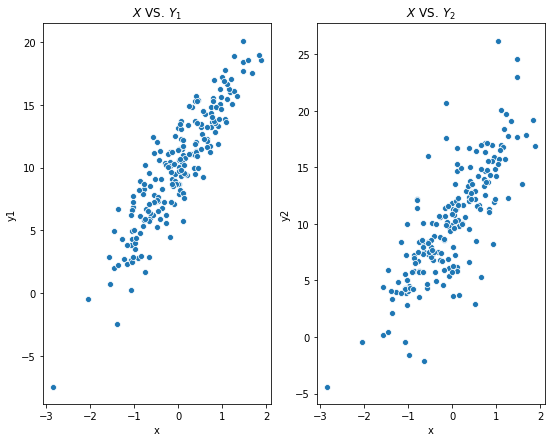

In [4]:
fig,axs = plt.subplots(1,2,figsize=(9, 7))

sns.set_style("whitegrid")

# Y1
sns.scatterplot(data=df,x=df["x"],y=df["y1"],ax=axs[0])
axs[0].set_title("$X$ VS. $Y_1$")

# Y2
sns.scatterplot(data=df,x=df["x"],y=df["y2"],ax=axs[1])
axs[1].set_title("$X$ VS. $Y_2$")

plt.show()

## Estadísticas descriptiva de las variables dependientes (y1,y2)

In [5]:
df["y1"].describe()

count    200.000000
mean       9.973801
std        4.556937
min       -7.426062
25%        7.009807
50%       10.202157
75%       13.334931
max       20.108906
Name: y1, dtype: float64

In [6]:
df["y2"].describe()

count    200.000000
mean      10.079613
std        5.057934
min       -4.377556
25%        6.474734
50%       10.034785
75%       13.474262
max       26.204383
Name: y2, dtype: float64

### Histogramas relativos

¿Los histogramas se asemejan a una forma conocida?¿tal que a una distribución de densidad de probabilidad?

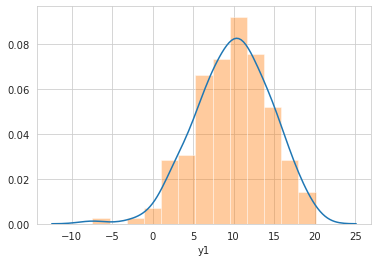

In [7]:
sns.distplot(df["y1"],kde=True, kde_kws={"color":"tab:blue"}, hist_kws={"color":"tab:orange"})
plt.show()

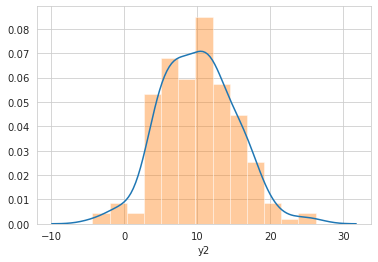

In [8]:
sns.distplot(df["y2"],kde=True, kde_kws={"color":"tab:blue"}, hist_kws={"color":"tab:orange"})
plt.show()

# Regresión Lineal Versión 1

Para desarrollar los modelos *Versión 1* se utilizará el modelo *LinearRegression*, el cual calcula el valor de los parámetros (betas) por media de un algoritmo de minimización del error cuadrático medio (MSE por sus siglas en ingles). El desempeño de un algoritmo, así como los parámetros que calcula dependen de la forma de la función que se desea minimizar, como se verá más adelante.

## Modelo de regresión lineal $Y_1$

Se genera un modelo de regresión lineal por medio de la función *LinearRegression* de **sklearn**. El modelo contiene una sola variable explicativa $x$, una variable dependiente $y1$ y un conjunto de entrenamiento de $70\%$.

In [9]:
x = df[["x"]]
y1 = df[["y1"]]
y2 = df[["y2"]]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y1, test_size=0.3, random_state=42)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

¿Qué valores toma $\beta_{0}$ y $\beta_{1}$?

In [11]:
beta0 = linreg.intercept_
beta1 = linreg.coef_
print(f"El intercepto es: {beta0}  y la pendiente es {beta1[0]}")

El intercepto es: [10.06712786]  y la pendiente es [5.25805492]


Como métricas para evaluar el modelo se utiliza el error cuadrático medio (*mean_squared_error*) y el error absoluto medio (*mean_absolute_error*).

In [12]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f'MSE: {round(mse,4)}')
print(f'MAE: {round(mae,4)}')

MSE: 3.6563
MAE: 1.5563


Se calcula el vector de error del modelo

In [13]:
error1 = y_test - y_pred
error1.head()

,y1
95,0.186075
15,-4.356532
30,0.048625
158,1.328049
128,1.523241


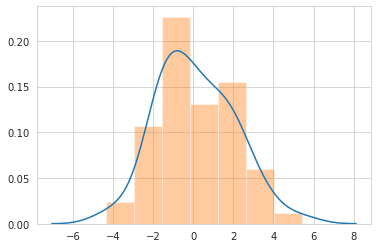

In [14]:
sns.distplot(error1,kde=True,hist_kws={"color":"tab:orange"})
plt.show()

## Modelo de regresión lineal $Y_2$

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y2, test_size=0.3, random_state=42)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

In [16]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f'MSE: {round(mse,4)}')
print(f'MAE: {round(mae,4)}')

MSE: 13.1251
MAE: 2.5136


In [17]:
error2 = y_test - y_pred
error2.head()

,y2
95,0.698761
15,2.214989
30,-0.040264
158,-0.223026
128,5.988654


La forma del histograma es particular, es simetrica, pero no se ajusta al comportamiento usual de una distribución normal. **Investigue sobre la distribución de Laplace**.

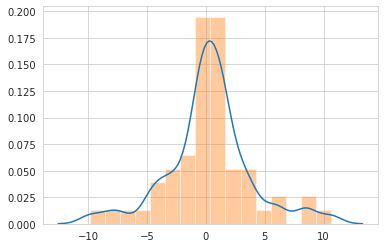

In [18]:
sns.distplot(error2,kde=True,hist_kws={"color":"tab:orange"})
plt.show()

# Regresión Lineal Versión 2


## Modelo 1

El modelo contiene una sola variable explicativa $x$, una variable dependiente $y1$ y un conjunto de entrenamiento de $70\%$ de los datos.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y1, test_size=0.3, random_state=42)
df_m1_v2 = pd.concat([X_train,y_train],axis=1,join='inner')

In [20]:
mod = smf.quantreg('y1 ~ x', df_m1_v2)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                     y1   Pseudo R-squared:               0.6043
Model:                       QuantReg   Bandwidth:                       1.685
Method:                 Least Squares   Sparsity:                        4.699
Date:                Thu, 24 Nov 2022   No. Observations:                  140
Time:                        18:51:44   Df Residuals:                      138
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9487      0.199     49.923      0.000       9.555      10.343
x              5.2592      0.241     21.820      0.000       4.783       5.736


El nuevo modelo (la versión 2 de regresión lineal) difiere del primero en la forma en que calcula los parámetros. En particular, el modelo actual utiliza el error medio absoluto para entrenar el modelo. Para más información revise los siguientes enlaces: https://stats.stackexchange.com/questions/388341/linear-regression-minimising-mad-in-sklearn, https://www.datasciencecentral.com/quantile-regression-in-python/.

In [21]:
w = [res.params['Intercept'],res.params['x']]
print(w)

[9.94869951258705, 5.259204075680665]


### Probar el modelo

Ahora se desea corroborar el modelo por medio de la predicción de los datos

In [22]:
y_pred_y1 = w[0] + w[1]*x

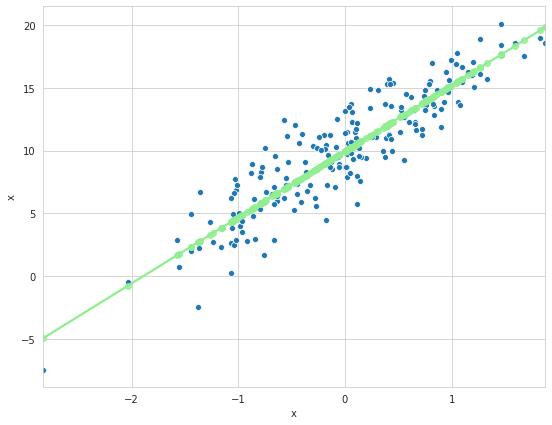

In [23]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.set_style("whitegrid")

sns.scatterplot(data=df,x=df["x"],y=df["y1"])
sns.regplot(x=df["x"],y=y_pred_y1,color="lightgreen")
axs[0].set_title("$X$ VS. $Y_1$")
fig.show()

In [24]:
y_pred_y1 = w[0] + w[1]*X_test
mse = mean_squared_error(y_test,y_pred_y1)
mae = mean_absolute_error(y_test,y_pred_y1)
print(f'MSE: {round(mse,4)}')
print(f'MAE: {round(mae,4)}')

MSE: 3.6998
MAE: 1.5524


In [25]:
result = pd.concat([df[["y1"]],y_pred_y1],axis=1, join='inner')
result.columns = ["y_1","y_1_pred"]
result["error"] = result.apply(lambda x: x["y_1"]-x["y_1_pred"],axis=1)
result.head()

,y_1,y_1_pred,error
5,8.711944,9.924019,-1.212076
9,14.259320,13.192382,1.066937
15,1.707617,5.944846,-4.237229
16,12.029384,12.050431,-0.021048
18,13.638309,13.934250,-0.295941


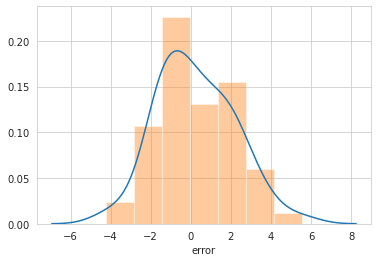

In [26]:
sns.distplot(result["error"],kde=True,hist_kws={"color":"tab:orange"})
plt.show()

## Modelo 2

Se repite el procedimiento anterior, pero utilizando $y_2$ en lugar de $y_1$.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y2, test_size=0.3, random_state=42)
df_m2_v2 = pd.concat([X_train,y_train],axis=1,join='inner')

In [28]:
mod = smf.quantreg('y2 ~ x', df_m2_v2)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                     y2   Pseudo R-squared:               0.5293
Model:                       QuantReg   Bandwidth:                       1.568
Method:                 Least Squares   Sparsity:                        4.564
Date:                Thu, 24 Nov 2022   No. Observations:                  140
Time:                        18:53:11   Df Residuals:                      138
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2907      0.194     53.163      0.000       9.908      10.673
x              5.1801      0.234     22.126      0.000       4.717       5.643


In [29]:
w = [res.params['Intercept'],res.params['x']]
print(w)

[10.290681045284245, 5.180067862927758]


### Probar el modelo

Ahora se desea corroborar el modelo por medio de la predicción de los datos

In [30]:
# =====================================================
# COMPLETAR ===========================================
# reemplace 0 por la expresión correcta para y_pred_y2 
#
y_pred_y2 = np.zeros(len(x))
# =====================================================

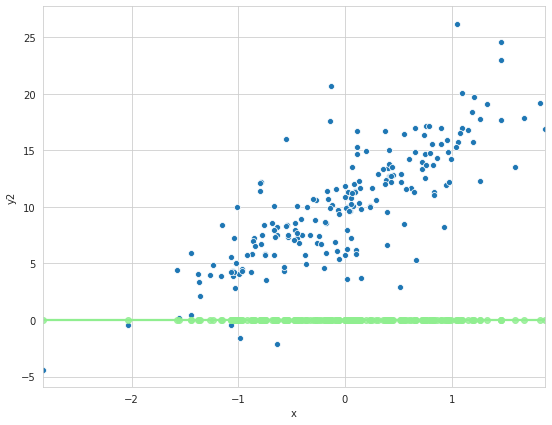

In [31]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.set_style("whitegrid")

sns.scatterplot(data=df,x=df["x"],y=df["y2"])
sns.regplot(x=df["x"],y=y_pred_y2,color="lightgreen")
axs[0].set_title("$X$ VS. $Y_1$")
fig.show()

In [32]:
y_pred_y2 = w[0] + w[1]*X_test
# =====================================================
# COMPLETAR ===========================================
# reemplace 0 por la expresión correcta para mse y para mae
#
mse = 0
mae = 0
# =====================================================

print(f'MSE: {round(mse,4)}')
print(f'MAE: {round(mae,4)}')

MSE: 0
MAE: 0


In [33]:
result = pd.concat([y_test,y_pred_y2],axis=1, join='inner')
result.columns = ["y_2","y_2_pred"]
result["error"] = result.apply(lambda x: x["y_2"]-x["y_2_pred"],axis=1)
result.head()

,y_2,y_2_pred,error
95,16.762024,16.236698,0.525326
15,8.396639,6.347074,2.049565
30,7.304447,7.511077,-0.206630
158,15.276371,15.672375,-0.396004
128,16.696876,10.877316,5.819560


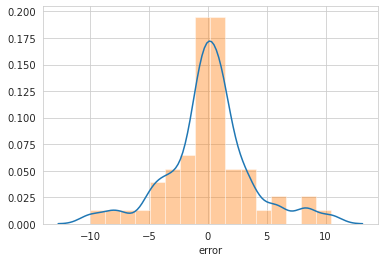

In [34]:
sns.distplot(result["error"],kde=True,hist_kws={"color":"tab:orange"})
plt.show()